In [456]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [457]:
# Метод Гаусса
def gaussFunc(matrix):
    copy_matrix = np.copy(matrix)
    for nrow, row in enumerate(copy_matrix):
        divider = row[nrow]
        row /= divider
        for lower_row in copy_matrix[nrow+1:]:
            factor = lower_row[nrow]
            lower_row -= factor * row
    return copy_matrix

def gauss_reverse(matrix):
    n_row=matrix.shape[0]
    x= [None] * n_row
    for i in range(n_row-1, -1,-1):
        x[i]=matrix[i,-1]-np.dot(matrix[i, i+1:n_row], x[i+1:])
    return np.array(x)

def gauss_method(matrix):
    return gauss_reverse(gaussFunc(matrix))

In [458]:
# Отрезок
my_N = 9
a = 0.1 + 0.05 * my_N
b = 1 + a
print(f"a: {a} \nb: {b}")

a: 0.55 
b: 1.55


In [459]:
# Узлы
n = 10
h = 1 / 10
nodes = [round(a + i * h, 3) for i in range(0, n + 1)]
print("Узлы:", nodes)

Узлы: [0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55]


In [460]:
# Значения в узлах
f_nodes = [a * math.e**(-x) + (1 - a) * math.cos(x) for x in nodes]
print("Значения в узлах:\n", f_nodes)
for x in f_nodes:
    print(round(x, 4), end=', ')

Значения в узлах:
 [0.7009584306360452, 0.645362886565634, 0.5890615950007776, 0.5320706282200417, 0.4744649531587233, 0.41637273356241256, 0.3579695715563501, 0.2994727013509755, 0.241135152547109, 0.1832399046669037, 0.12609405811610028]
0.701, 0.6454, 0.5891, 0.5321, 0.4745, 0.4164, 0.358, 0.2995, 0.2411, 0.1832, 0.1261, 

In [461]:
# Точки для восстановления
x_find = [nodes[0] + 2 * h / 3, nodes[int(n / 2)] + 0.5 * h, nodes[n] - h / 3]
print("Точки для восстановления:\n", x_find)

Точки для восстановления:
 [0.6166666666666667, 1.1, 1.5166666666666666]


In [462]:
# Метод наименьших квадратов (МНК)
m = int(n / 2)
print("Степень полинома:", m)

def MNK(nodes, funcs, m):
    n = len(nodes)
    matrix = np.zeros((m + 1, m + 2))
    for k in range(0, m + 1):
        for i in range(0, m + 1):
            for j in range(0, n):
                matrix[k][i] += nodes[j]**(i + k)
        for i in range(0, n):
            matrix[k][m + 1] += funcs[i] * nodes[i]**k
    return gauss_method(matrix)


coeff = MNK(nodes, f_nodes, m)
print("Коэффициенты многочлена:\n", coeff)

Степень полинома: 5
Коэффициенты многочлена:
 [ 1.00005981 -0.55040221  0.05109348 -0.09318502  0.04274368 -0.00484003]


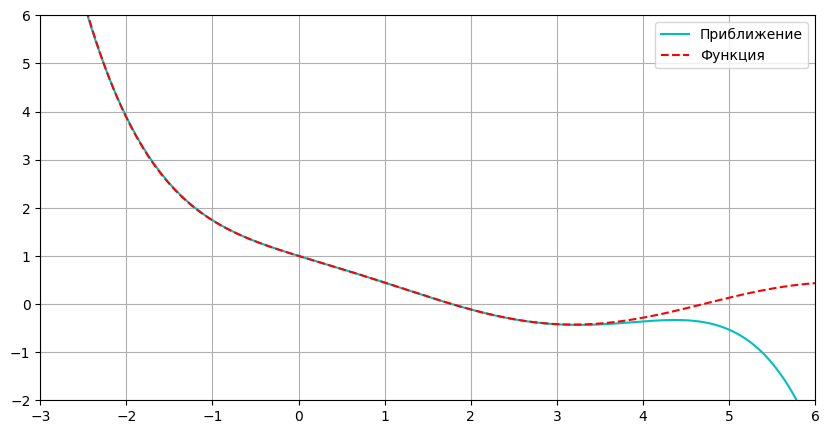

In [463]:
# Графики
def func(x, a):
    return a * math.e**(-x) + (1 - a) * math.cos(x)

def polynom(x, coeffs):
    res = 0
    for i in range(len(coeffs)):
        res += x**i * coeffs[i]
    return res

l, r = int(a - 6), int(b + 6)
x = np.arange(l, r, 0.001)
y_approx = [polynom(i, coeff) for i in x]
y_func = [func(i, a) for i in x]
plt.figure(figsize=(10,5))
plt.plot(x, y_approx, color="c", label="Приближение")
plt.plot(x, y_func, color="r", linestyle='--', label="Функция")
plt.xlim(-3, 6)
plt.ylim(-2, 6)
plt.grid()
plt.legend()

In [464]:
# Значения в точках восстановления
y_find_MNK = [polynom(i, coeff) for i in x_find]
print("Восстановленные значения:", y_find_MNK)

Восстановленные значения: [0.6639721063254683, 0.38719733942043694, 0.1450396192228639]


In [465]:
# Истинная погрешность
r_MNK = [abs(func(i, a) - polynom(i, coeff)) for i in x_find]
print("Истинная погрешность:", r_MNK)

Истинная погрешность: [3.329822140241134e-08, 1.1255016585387523e-08, 1.3148866689904892e-08]


In [466]:
# Теоретическая погрешность
delta_f_MNK = 0
for i in range(len(nodes)):
    delta_f_MNK += (f_nodes[i] - polynom(nodes[i], coeff))**2
delta_f_MNK = math.sqrt(delta_f_MNK)
print("Погрешность:", delta_f_MNK)

Погрешность: 4.5770075957360186e-08


In [467]:
# Многочлен Лагранжа
def lagrange_interp(nodes, funcs, find_x):
    results = []
    n = len(nodes)
    for x in find_x:
        pol = 0
        for i in range(n):
            base = 1
            for j in range(n):
                if i != j:
                    base *= (x - nodes[j]) / (nodes[i] - nodes[j])
            pol += base * funcs[i]
        results.append(pol)
    return results

y_find_lagrange = lagrange_interp(nodes, f_nodes, x_find)
print("Восстановленные значения:", y_find_lagrange)

Восстановленные значения: [0.6639721396236813, 0.38719735067545374, 0.14503963237175216]


In [468]:
# Истинная погрешность
y_real = [func(x, a) for x in x_find]
r_lagrange = [abs(y_real[i] - y_find_lagrange[i]) for i in range(len(x_find))]
print("Истинная погрешность:", r_lagrange)

Истинная погрешность: [8.43769498715119e-15, 2.220446049250313e-16, 2.1566082253343666e-14]


M: 0.333166308280502


C:\Users\MSI\AppData\Local\Temp\ipykernel_18736\384070228.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(b, M, "go", color="m")


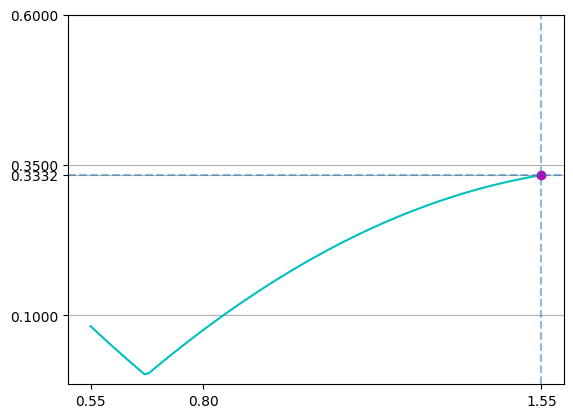

In [469]:
# Теоретическая погрешность
# Производная 11 порядка
def func_der(x, a):
    return abs(- a * math.e**(-x) + (1 - a) * math.sin(x))

# Находим максимум модуля функции
x = np.arange(a, b + 0.001, 0.01)
y = [func_der(i, a) for i in x]
M = max(y)
plt.plot(x, y, color="c")
plt.plot(b, M, "go", color="m")
plt.axhline(func_der(b, a), linestyle="--", alpha=0.5)
plt.axvline(b, linestyle="--", alpha=0.5)
plt.xticks([b] + list(np.arange(a, 1.0, 0.25)))
plt.yticks([M] + list(np.arange(0.1, 0.80, 0.25)))
plt.grid(axis="y")
print("M:", M)

In [470]:
w = [1 for i in range(len(x_find))]
for i in range(len(x_find)):
    for j in range(n + 1):
        w[i] *= (x_find[i] - nodes[j])
print(w)

[1.923941585237117e-06, -4.79652099609374e-08, -4.1006717359029575e-06]


In [471]:
# Погрешности для точек
delta_r_lagrange = []
fact = math.factorial(n + 1)
for i in range(len(w)):
    delta_r_lagrange.append(abs(M * w[i]) / fact)
print("Оценки погрешностей для точек восстановления:", delta_r_lagrange)
for i in range(len(w)):
    print(f"r_{i} <= {delta_r_lagrange[i]}")

Оценки погрешностей для точек восстановления: [1.6058213967572225e-14, 4.0034251063674126e-16, 3.4226332364342484e-14]
r_0 <= 1.6058213967572225e-14
r_1 <= 4.0034251063674126e-16
r_2 <= 3.4226332364342484e-14


In [472]:
# Метод Ньютона
def get_sep_diff_table(nodes, funcs):
    n = len(nodes)
    sep_diff_table = [
        nodes,
        funcs
    ]
    # Столбцы
    for i in range(1, n):
        column = []
        # Строки
        for j in range(n - i):
            column.append((sep_diff_table[i][j + 1] - sep_diff_table[i][j]) / (sep_diff_table[0][j + i] - sep_diff_table[0][j]))
        sep_diff_table.append(column)
    return sep_diff_table

def newton_interp(nodes, funcs, find_x):
    n = len(nodes)
    sep_diff_table = get_sep_diff_table(nodes, funcs)
    results = []
    for x in find_x:
        find_y = funcs[0]
        prev = 1
        for i in range(1, n):
            prev *= (x - nodes[i - 1])
            find_y += prev * sep_diff_table[i + 1][0]
        results.append(find_y)
    return results

y_find_newton = newton_interp(nodes, f_nodes, x_find)
print("Восстановленные значения:", y_find_newton)

Восстановленные значения: [0.6639721396236812, 0.38719735067545374, 0.14503963237175233]


In [473]:
# Истинная погрешность
r_newton = [abs(y_real[i] - y_find_newton[i]) for i in range(len(x_find))]
print("Истинная погрешность:", r_newton)

Истинная погрешность: [8.548717289613705e-15, 2.220446049250313e-16, 2.173261570703744e-14]


In [474]:
print("Погрешность метода Ньютона\n",r_newton)
print("Погрешность метода Лагранжа\n",r_lagrange)

Погрешность метода Ньютона
 [8.548717289613705e-15, 2.220446049250313e-16, 2.173261570703744e-14]
Погрешность метода Лагранжа
 [8.43769498715119e-15, 2.220446049250313e-16, 2.1566082253343666e-14]


In [475]:
# Погрешность из формулы
r_sep_diff = []
for i in range(len(x_find)):
    r_sep_diff.append(abs(w[i] * get_sep_diff_table(nodes + [x_find[i]], f_nodes + [func(x_find[i], a)])[n + 2][0]))
print(r_sep_diff)

[8.609619208996504e-15, 2.0254133203603904e-16, 2.1662964790597657e-14]


In [476]:
# Теоретическая погрешность как у метода Лагранжа
delta_r_newton = delta_r_lagrange
for i in range(len(w)):
    print(f"r_{i} <= {delta_r_newton[i]}")

r_0 <= 1.6058213967572225e-14
r_1 <= 4.0034251063674126e-16
r_2 <= 3.4226332364342484e-14


In [477]:
# Многочлен Чебышева
# Пересчитываем узлы
nodes_cheb = []
for i in range(n + 1):
    nodes_cheb.append((a + b) / 2 + math.cos((2 * i + 1) * math.pi / (2 * (n + 1))) * (b - a) / 2)
print("Новые узлы:", nodes_cheb)

Новые узлы: [1.5449107209404664, 1.5048159976772593, 1.4278747871771291, 1.3203204087277989, 1.190866278420715, 1.0500000000000003, 0.9091337215792852, 0.7796795912722014, 0.672125212822871, 0.5951840023227409, 0.5550892790595336]


In [478]:
# Значения в узлах
f_nodes_cheb = []
for i in range(n + 1):
    f_nodes_cheb.append(func(nodes_cheb[i], a))
print("Новые значения в узлах:", f_nodes_cheb)

Новые значения в узлах: [0.12897922579696025, 0.15180159197397547, 0.19599588661101178, 0.2584166221225385, 0.33406178893396254, 0.41637273356241244, 0.4980734423637348, 0.5722165789400292, 0.6329673098379316, 0.6759240049847772, 0.698145582315176]


In [479]:
# Воспользуемся многочленом Ньютона по новой сетке узлов
y_find_cheb = newton_interp(nodes_cheb, f_nodes_cheb, x_find)
print("Восстановленные значения:", y_find_cheb)

Восстановленные значения: [0.6639721396236916, 0.38719735067545563, 0.14503963237173215]


In [480]:
# Истинная погрешность
r_cheb = [abs(y_real[i] - y_find_cheb[i]) for i in range(len(x_find))]
print("Истинная погрешность:", r_cheb)

Истинная погрешность: [1.887379141862766e-15, 2.1094237467877974e-15, 1.5543122344752192e-15]


In [481]:
# Сравнение с методом Ньютона
print("Погрешность метода Ньютона\n",r_newton)
print("Погрешность на Чебышевской сетке\n",r_cheb)

Погрешность метода Ньютона
 [8.548717289613705e-15, 2.220446049250313e-16, 2.173261570703744e-14]
Погрешность на Чебышевской сетке
 [1.887379141862766e-15, 2.1094237467877974e-15, 1.5543122344752192e-15]


In [482]:
# Теоретическая погрешность общая
delta_r_cheb_gen = (M * pow(b - a, n + 1)) / (math.factorial(n + 1) * pow(2, 2 * n + 1))
print("Оценка для погрешностей:", delta_r_cheb_gen)

Оценка для погрешностей: 3.979930145941079e-15


In [483]:
# Теоретическая погрешность для каждой точки
# Ищем w на чебышевской сетке
w_cheb = [1 for i in range(len(x_find))]
for i in range(len(x_find)):
    for j in range(n + 1):
        w_cheb[i] *= (x_find[i] - nodes_cheb[j])
print("w:", w_cheb)
# Погрешности
delta_r_cheb = []
fact = math.factorial(n + 1)
for i in range(len(w)):
    delta_r_cheb.append(abs(M * w_cheb[i]) / fact)
print("Оценки погрешностей для точек восстановления:", delta_r_cheb)
for i in range(len(w)):
    print(f"r_{i} <= {delta_r_cheb[i]}")

w: [-4.095447157770209e-07, -4.253583935546856e-07, -2.9726669131041373e-07]
Оценки погрешностей для точек восстановления: [3.418272532648346e-15, 3.5502616862258365e-15, 2.4811419281768608e-15]
r_0 <= 3.418272532648346e-15
r_1 <= 3.5502616862258365e-15
r_2 <= 2.4811419281768608e-15


In [484]:
# Почему для второй точки восстановления точность ухудшилась?
print("Точка", x_find[1])
print("Новые узлы", nodes_cheb[::-1])
print("Старые узлы", nodes)

Точка 1.1
Новые узлы [0.5550892790595336, 0.5951840023227409, 0.672125212822871, 0.7796795912722014, 0.9091337215792852, 1.0500000000000003, 1.190866278420715, 1.3203204087277989, 1.4278747871771291, 1.5048159976772593, 1.5449107209404664]
Старые узлы [0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55]


C:\Users\MSI\AppData\Local\Temp\ipykernel_18736\4120048841.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_find, [0] * len(x_find), "go", color="green", label="Точки восстановления")
C:\Users\MSI\AppData\Local\Temp\ipykernel_18736\4120048841.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_find, [1] * len(x_find), "go", color="green")


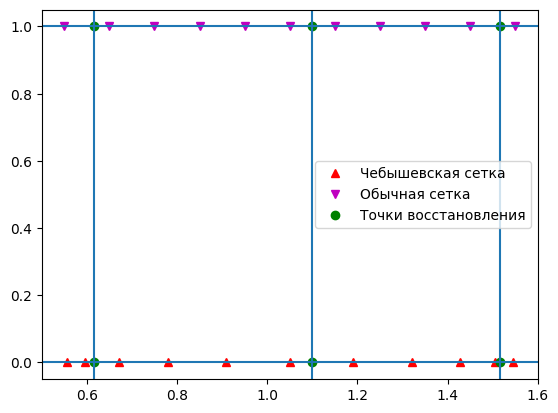

In [485]:
y_plt_1 = [0]* len(nodes_cheb)
y_plt_2 = [1]* len(nodes_cheb)
plt.plot(nodes_cheb, y_plt_1, '^', color="red", label="Чебышевская сетка")
plt.plot(nodes, y_plt_2, 'v', color="m", label="Обычная сетка")
plt.plot(x_find, [0] * len(x_find), "go", color="green", label="Точки восстановления")
plt.plot(x_find, [1] * len(x_find), "go", color="green")
for x in x_find:
    plt.axvline(x)
plt.axhline(0)
plt.axhline(1)
plt.legend()

In [486]:
# Интерполяция в конце таблицы
# Берём 4 узла
m = 4
nodes_end = nodes[len(nodes) - m:]
f_nodes_end = f_nodes[len(f_nodes) - m:]
print("Узлы:", nodes_end)
print("Значения в них:", f_nodes_end)
print("Точки восстановления:", x_find)

Узлы: [1.25, 1.35, 1.45, 1.55]
Значения в них: [0.2994727013509755, 0.241135152547109, 0.1832399046669037, 0.12609405811610028]
Точки восстановления: [0.6166666666666667, 1.1, 1.5166666666666666]


In [487]:
# Таблица конечных разностей
def get_finite_diff_table(nodes, funcs):
    n = len(nodes)
    finite_diff_table = [
        nodes,
        funcs
    ]
    # Столбцы
    for i in range(1, n):
        column = []
        # Строки
        for j in range(n - i):
            column.append((finite_diff_table[i][j + 1] - finite_diff_table[i][j]))
        finite_diff_table.append(column)
    return finite_diff_table

finite_table = get_finite_diff_table(nodes_end, f_nodes_end)
print("Таблица конечных разностей\n", finite_table)

Таблица конечных разностей
 [[1.25, 1.35, 1.45, 1.55], [0.2994727013509755, 0.241135152547109, 0.1832399046669037, 0.12609405811610028], [-0.05833754880386649, -0.05789524788020528, -0.05714584655080343], [0.00044230092366120966, 0.0007494013294018498], [0.0003071004057406401]]


In [488]:
# Проверка функции
x = np.arange(0, 0.8, 0.1)
y = [math.sin(i) for i in x]
print(get_finite_diff_table(x, y))

[array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]), [0.0, 0.09983341664682815, 0.19866933079506122, 0.2955202066613396, 0.3894183423086505, 0.479425538604203, 0.5646424733950355, 0.6442176872376911], [0.09983341664682815, 0.09883591414823306, 0.09685087586627839, 0.09389813564731092, 0.09000719629555248, 0.08521693479083248, 0.07957521384265565], [-0.000997502498595093, -0.0019850382819546764, -0.0029527402189674645, -0.003890939351758438, -0.004790261504720006, -0.0056417209481768316], [-0.0009875357833595833, -0.0009677019370127882, -0.0009381991327909733, -0.000899322152961568, -0.0008514594434568257], [1.983384634679508e-05, 2.9502804221814838e-05, 3.88769798294053e-05, 4.786270950474236e-05], [9.668957875019757e-06, 9.374175607590463e-06, 8.985729675337062e-06], [-2.9478226742929436e-07, -3.8844593225340063e-07], [-9.366366482410626e-08]]


In [489]:
# Старые узлы
print(x_find)

[0.6166666666666667, 1.1, 1.5166666666666666]


In [490]:
# Замена на t
t_find = []
for node in x_find:
    t_find.append((node - nodes_end[::-1][0]) / h)
print(t_find)

[-9.333333333333332, -4.499999999999999, -0.33333333333333437]


In [491]:
# Интерполирование
def table_end_interp(nodes, funcs, find_x):
    n = len(nodes)
    fin_tab = get_finite_diff_table(nodes, funcs)
    results = []
    for iter, x in enumerate(find_x):
        find_y = funcs[n - 1]
        prev = 1
        fact = 1
        for i in range(1, n):
            prev *= x + i - 1
            find_y += prev * fin_tab[i + 1][n - i - 1] / fact
            fact *= i + 1
        results.append(find_y)
    return results

y_find_end = table_end_interp(nodes_end, f_nodes_end, t_find)
print("В конце таблицы:", y_find_end)

В конце таблицы: [0.6594051822620298, 0.38713655665108226, 0.14504045000348767]


In [492]:
# Истинная погрешность
r_end = [abs(y_real[i] - y_find_end[i]) for i in range(len(x_find))]
print("Истинная погрешность:", r_end)

Истинная погрешность: [0.004566957361659907, 6.0794024371257915e-05, 8.176317570773861e-07]


M: 0.2994727013509755


C:\Users\MSI\AppData\Local\Temp\ipykernel_18736\3531924216.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(a, M, "go", color="m")


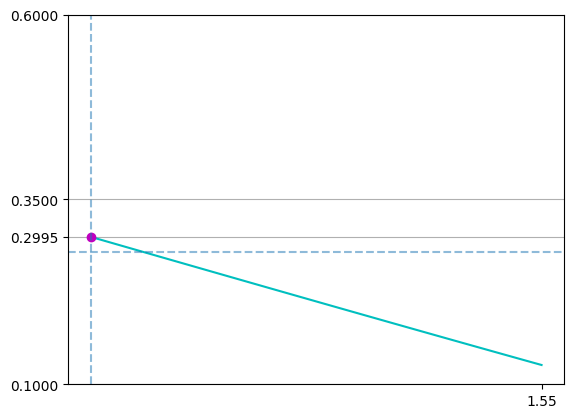

In [493]:
# Теоретическая погрешность
# Производная 4 порядка совпадет с самой функцией
a, b = 1.25, 1.55
x = np.arange(a, b + 0.001, 0.01)
y = [func(i, 0.55) for i in x]
M = max(y)
plt.plot(x, y, color="c")
plt.plot(a, M, "go", color="m")
plt.axhline(func(a, a), linestyle="--", alpha=0.5)
plt.axvline(a, linestyle="--", alpha=0.5)
plt.xticks([b] + list(np.arange(a, 1.0, 0.25)))
plt.yticks([M] + list(np.arange(0.1, 0.80, 0.25)))
plt.grid(axis="y")
print("M:", M)

In [494]:
# Теоретическая погрешность
k = m - 1
w_end = []
for t in t_find:
    w_temp = t
    for i in range(k):
        w_temp *= t + i + 1
    w_end.append(w_temp)
print("w:",w_end)

delta_r_end = []
fact = math.factorial(k + 1)
for i in range(len(t_find)):
    delta_r_end.append(pow(h, k + 1) * w_end[i] * M / fact)

print("Теоретическая погрешность", delta_r_end)

w: [3612.345679012343, 59.06249999999992, -0.9876543209876549]
Теоретическая погрешность [0.00450749549461396, 7.369836009809153e-05, -1.232397947946402e-06]
